# MPG Prediction Parts 1 & 2

## Part 1: Data collection and Exploration:

### Data collection and Exploration

### Load Data from Source
### Data Overview
### Data Analysis: Univariat and Multivariat¶

## Part 2: Data Transformation and Clearning:

### Setting aside Test Data
### Transform the catogorical data
### Impute the missing values
### Add new festures
### Scale the numeric values


### Build the pipeline to include all transformations

# Part 1 Data Collection and Exploration

In [ ]:
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##        Load Data from Source

In [2]:
import wget

In [3]:
wget.download("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

'auto-mpg (16).data'

In [4]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe for exploration
data = df.copy()

In [ ]:
##        Data Overview

In [5]:
data.shape

(398, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##        Data Analysis: Univariat and Multivariat 

In [9]:
# Checking for null

In [10]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
# check for Horsepoer outliers

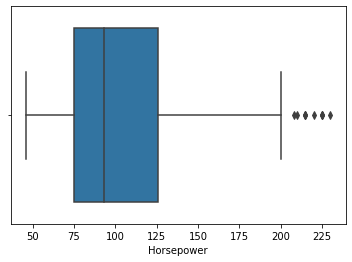

In [12]:
sns.boxplot(x=data['Horsepower'])

In [13]:
# Observing that there are quiate a few outliers
# choose median as replacement for null

In [ ]:
## Univariat Analysis

MPG                 AxesSubplot(0.125,0.71587;0.352273x0.16413)
Cylinders        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Displacement       AxesSubplot(0.125,0.518913;0.352273x0.16413)
Horsepower      AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Weight             AxesSubplot(0.125,0.321957;0.352273x0.16413)
Acceleration    AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Model Year            AxesSubplot(0.125,0.125;0.352273x0.16413)
Origin             AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

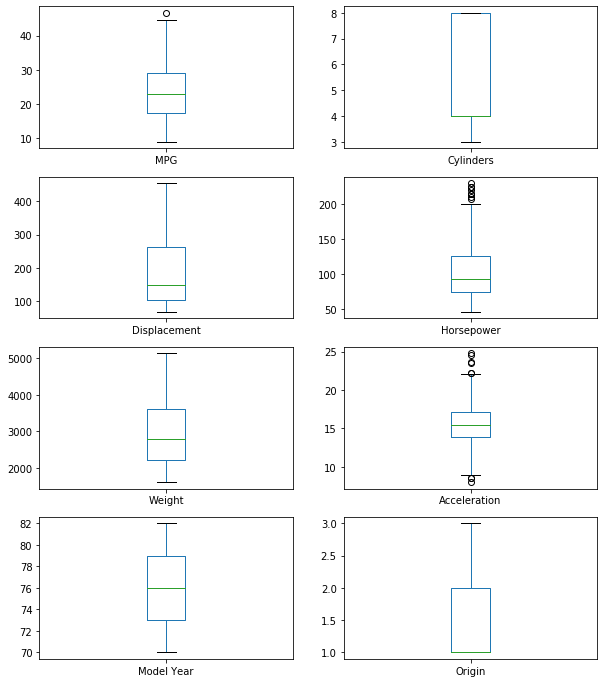

In [14]:

data.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(10,12))


In [104]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
# Observation: numerical features ranges vary widely, They need to be scaled before being 
# used as input to  model training

In [103]:
data['Model Year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: Model Year, dtype: int64

In [ ]:
## Multivariat Analysis

/Users/tsunchow/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsunchow/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


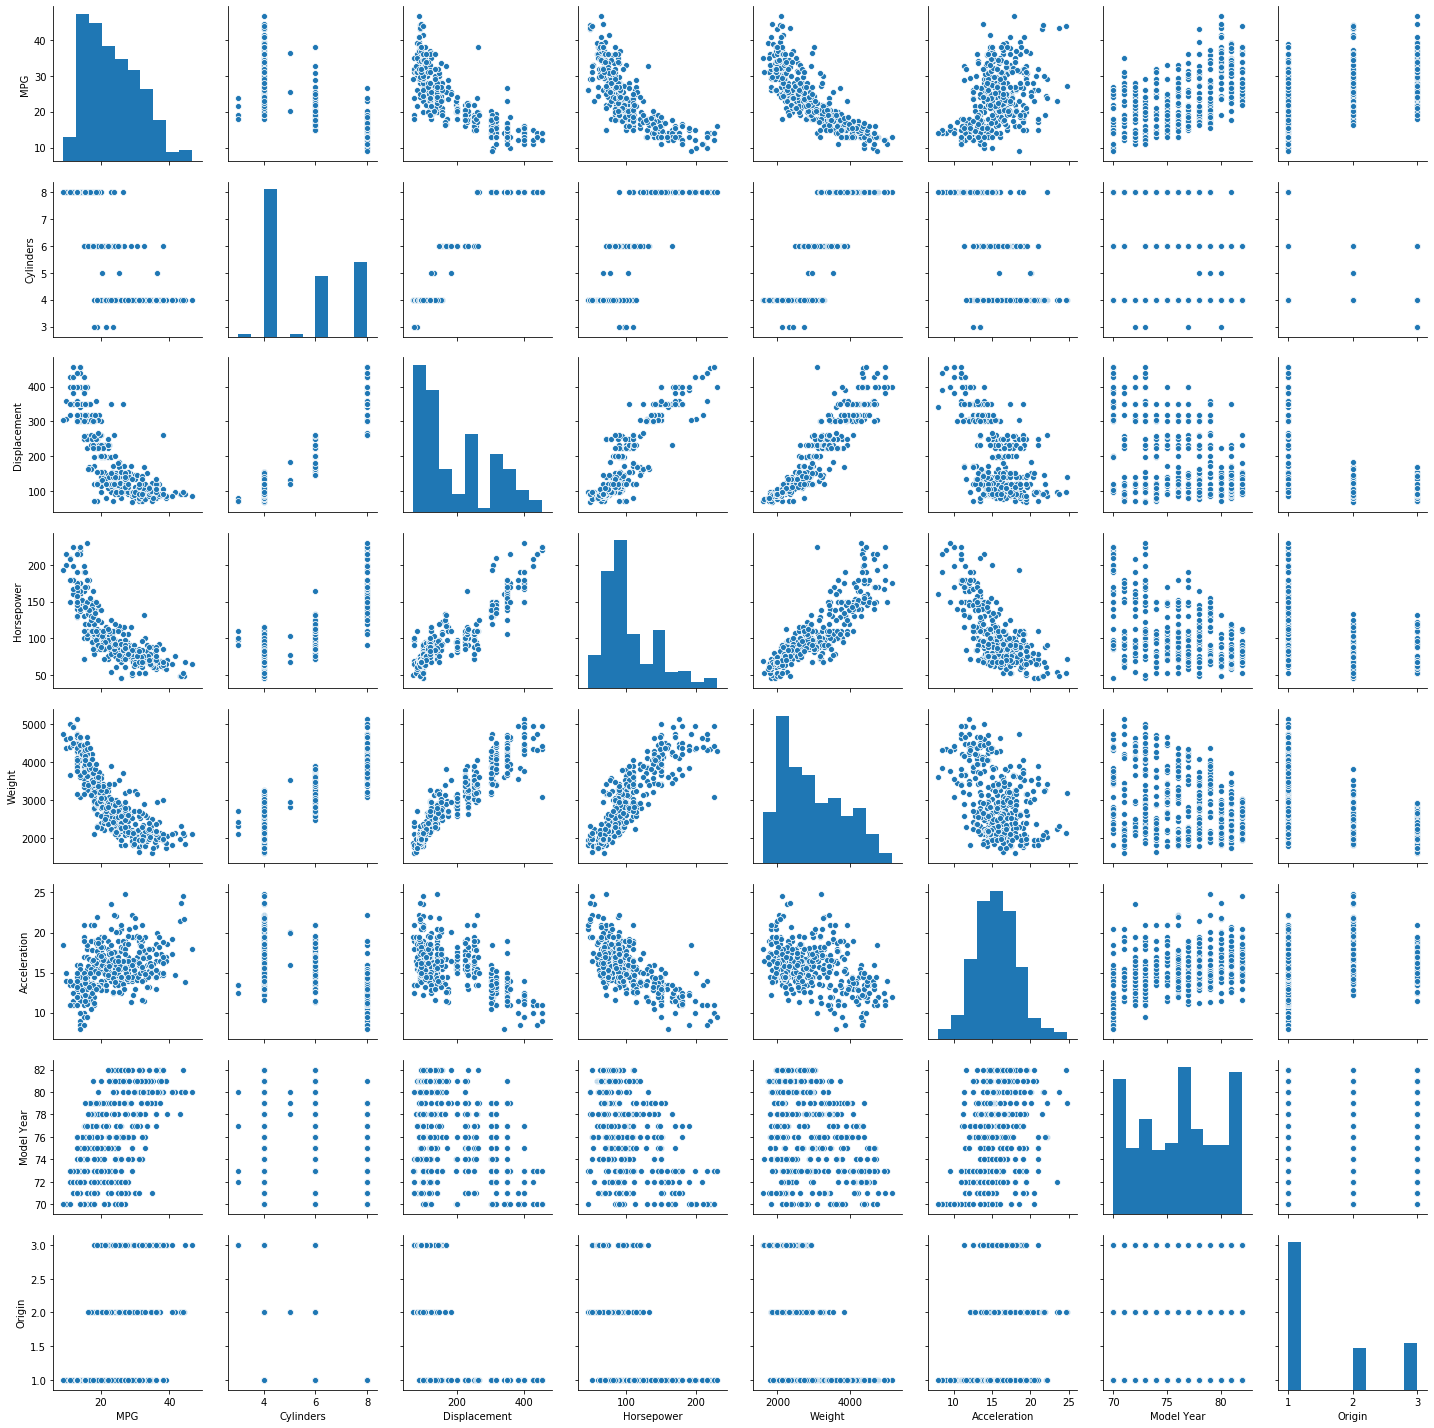

In [17]:
sns.pairplot(data)

In [18]:
# Observations: 
# Almost all nuermical fearture variables distributins not normal
    # Normal Scaler will work better
# Quite a few features are linearly related
    # Since the dataset is small and we are not interested in the stability of the linear
    # model, or the interpretability of the coefficients, we are going to leave these
    # correlated features as is.
# "Origin" feature is a norminal measure and thus needs to be encoded as categorical and 
#recoded using OneHotEncoding

In [19]:
# Correlation of features vs the Target variable MPG

In [20]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Cylinders      -0.775396
Horsepower     -0.778427
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

In [21]:
## Note that so far we have not made any changes to data

In [ ]:
##    Part 2: Data Transformation and Clearning

In [ ]:
##        Setting aside Test Data

In [22]:
# There two choices in sklearn. a. train_test_split and StratefiedShuffleSplit
# The StratefiedShuffleSplit gives us more control on the quality of split to make sure
# the train set is representative of the overall data.
# Given all the categorical features Cylinder seems to be the most important feature as
# indicated by its correlation to MPG. 
# We are going to split on "Cylinder"

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [24]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [25]:
strat_test_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
100,18.0,6,250.0,88.0,3021.0,16.5,73,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
160,17.0,6,231.0,110.0,3907.0,21.0,75,1


In [26]:
# Check the distribution of cylinders in the overal dataset vs strat_train_set

In [27]:
data.groupby('Cylinders').size()/len(data)

Cylinders
3    0.010050
4    0.512563
5    0.007538
6    0.211055
8    0.258794
dtype: float64

In [28]:
strat_train_set.groupby('Cylinders').size()/len(strat_train_set)

Cylinders
3    0.009434
4    0.512579
5    0.009434
6    0.210692
8    0.257862
dtype: float64

In [29]:
# Since we want to put all data transformations into a pipeline later,
# we will define functions or use methods from sklearn.
# For each transformation, we will follow a 2 step process:
            # build it
            # test it

In [ ]:
##        Transform the catogorical data

In [30]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
    return df

In [31]:
# Show data with Origin before conversion

In [32]:
sample=data.sample(n=10)
sample

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
93,14.0,8,318.0,150.0,4237.0,14.5,73,1
256,20.5,6,225.0,100.0,3430.0,17.2,78,1
208,13.0,8,318.0,150.0,3940.0,13.2,76,1
379,36.0,4,98.0,70.0,2125.0,17.3,82,1
112,19.0,4,122.0,85.0,2310.0,18.5,73,1
179,22.0,4,121.0,98.0,2945.0,14.5,75,2
34,16.0,6,225.0,105.0,3439.0,15.5,71,1
27,11.0,8,318.0,210.0,4382.0,13.5,70,1
220,33.5,4,85.0,70.0,1945.0,16.8,77,3
279,29.5,4,98.0,68.0,2135.0,16.6,78,3


In [33]:
##preprocess the Origin column in data
preprocess_origin_cols(sample)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
93,14.0,8,318.0,150.0,4237.0,14.5,73,India
256,20.5,6,225.0,100.0,3430.0,17.2,78,India
208,13.0,8,318.0,150.0,3940.0,13.2,76,India
379,36.0,4,98.0,70.0,2125.0,17.3,82,India
112,19.0,4,122.0,85.0,2310.0,18.5,73,India
179,22.0,4,121.0,98.0,2945.0,14.5,75,USA
34,16.0,6,225.0,105.0,3439.0,15.5,71,India
27,11.0,8,318.0,210.0,4382.0,13.5,70,India
220,33.5,4,85.0,70.0,1945.0,16.8,77,Germany
279,29.5,4,98.0,68.0,2135.0,16.6,78,Germany


In [34]:
sample1=sample

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe=OneHotEncoder(sparse=False)

In [37]:
ohe.fit_transform(sample1[["Origin"]])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [38]:
ohe.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

##        Impute the missing values

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
# before applying transform check for null

In [41]:
data["Horsepower"].isnull().sum()

6

In [42]:
imputer=SimpleImputer(strategy='median')

In [43]:
array=imputer.fit_transform(data[["Horsepower"]])

In [44]:
data_transformed=pd.DataFrame(array)
data_transformed.isnull().sum()

0    0
dtype: int64

##        Add new festures

In [45]:
# Since we have only a 8 features, does it make sense to introduce new interacting variables
# to improve linear models?
# The answer is maybe. It would help the linear regressor model that we are going to use
# but not SVM, decison tree or ensember models.
# So we are going to just try  adding 4 new variables by combining with "/" and "*"


In [46]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [47]:
data['displacement_and_power'] = data['Displacement'] * data['Horsepower']
data['weight_and_cylinder'] = data['Weight'] * data['Cylinders']
data['acceleration_and_power'] = data['Acceleration'] * data['Horsepower']
data['acceleration_and_cyl'] = data['Acceleration'] * data['Cylinders']

In [48]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                       1.000000
acceleration_on_cyl       0.732133
acceleration_on_power     0.710556
Model Year                0.579267
Origin                    0.563450
Acceleration              0.420289
weight_on_cylinder       -0.020778
displacement_on_power    -0.572176
acceleration_and_cyl     -0.592551
displacement_and_power   -0.748342
Cylinders                -0.775396
Horsepower               -0.778427
acceleration_and_power   -0.791929
Displacement             -0.804203
weight_and_cylinder      -0.805909
Weight                   -0.831741
Name: MPG, dtype: float64

In [49]:
# We decide to add only 2 of the new variables: weight_and_cylinder and acceleration_and_power.

# Define a customerized transformer to add 2 new attributes

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, wt_ix, hpower_ix, cyl_ix = 4, 3, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_and_power=True):
        self.acc_and_power = acc_and_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        wt_and_cyl = X[:, wt_ix] * X[:, cyl_ix] # required new variable
        if self.acc_and_power:
            acc_and_power = X[:, acc_ix] * X[:, hpower_ix]
            return np.c_[X, acc_and_power, wt_and_cyl] # returns a 2D array
        
        return np.c_[X, wt_and_cyl]

In [51]:
trial_data=sample1.drop("MPG", 1)

In [52]:
trial_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
93,8,318.0,150.0,4237.0,14.5,73,India
256,6,225.0,100.0,3430.0,17.2,78,India
208,8,318.0,150.0,3940.0,13.2,76,India
379,4,98.0,70.0,2125.0,17.3,82,India
112,4,122.0,85.0,2310.0,18.5,73,India
179,4,121.0,98.0,2945.0,14.5,75,USA
34,6,225.0,105.0,3439.0,15.5,71,India
27,8,318.0,210.0,4382.0,13.5,70,India
220,4,85.0,70.0,1945.0,16.8,77,Germany
279,4,98.0,68.0,2135.0,16.6,78,Germany


In [53]:
attr_adder = CustomAttrAdder(acc_and_power=True)
data_tr_extra_attrs = attr_adder.transform(trial_data.values)
data_tr_extra_attrs[0]

array([8, 318.0, 150.0, 4237.0, 14.5, 73, 'India', 2175.0, 33896.0],
      dtype=object)

In [54]:
trial_data_transformed=pd.DataFrame(data_tr_extra_attrs)
trial_data_transformed


,0,1,2,3,4,5,6,7,8
0,8,318,150,4237,14.5,73,India,2175,33896
1,6,225,100,3430,17.2,78,India,1720,20580
2,8,318,150,3940,13.2,76,India,1980,31520
3,4,98,70,2125,17.3,82,India,1211,8500
4,4,122,85,2310,18.5,73,India,1572.5,9240
5,4,121,98,2945,14.5,75,USA,1421,11780
6,6,225,105,3439,15.5,71,India,1627.5,20634
7,8,318,210,4382,13.5,70,India,2835,35056
8,4,85,70,1945,16.8,77,Germany,1176,7780
9,4,98,68,2135,16.6,78,Germany,1128.8,8540


# Scaling the numeric fatures with MaxMinScaler

In [ ]:
##        Scale the numeric values

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler=MinMaxScaler()

In [57]:
# drop the category column 6 from trial_data_transformed

In [58]:
trial_data_transformed.drop(trial_data_transformed.columns[6], axis=1, inplace=True)

In [59]:
trial_data_transformed

,0,1,2,3,4,5,7,8
0,8,318,150,4237,14.5,73,2175,33896
1,6,225,100,3430,17.2,78,1720,20580
2,8,318,150,3940,13.2,76,1980,31520
3,4,98,70,2125,17.3,82,1211,8500
4,4,122,85,2310,18.5,73,1572.5,9240
5,4,121,98,2945,14.5,75,1421,11780
6,6,225,105,3439,15.5,71,1627.5,20634
7,8,318,210,4382,13.5,70,2835,35056
8,4,85,70,1945,16.8,77,1176,7780
9,4,98,68,2135,16.6,78,1128.8,8540


In [60]:
scaled=scaler.fit_transform(trial_data_transformed)

In [61]:
scaled

array([[1.        , 1.        , 0.57746479, 0.94050062, 0.24528302,
        0.25      , 0.61317548, 0.95747177],
       [0.5       , 0.60085837, 0.22535211, 0.60935577, 0.75471698,
        0.66666667, 0.346501  , 0.46927702],
       [1.        , 1.        , 0.57746479, 0.81862946, 0.        ,
        0.5       , 0.49888641, 0.87036222],
       [0.        , 0.05579399, 0.01408451, 0.0738613 , 0.77358491,
        1.        , 0.04817724, 0.02639683],
       [0.        , 0.15879828, 0.11971831, 0.14977431, 1.        ,
        0.25      , 0.26005158, 0.05352691],
       [0.        , 0.15450644, 0.21126761, 0.41034058, 0.24528302,
        0.41666667, 0.17125777, 0.14664907],
       [0.5       , 0.60085837, 0.26056338, 0.61304883, 0.43396226,
        0.08333333, 0.29228695, 0.47125678],
       [1.        , 1.        , 1.        , 1.        , 0.05660377,
        0.        , 1.        , 1.        ],
       [0.        , 0.        , 0.01408451, 0.        , 0.67924528,
        0.58333333, 0.027663

In [62]:
# Now the values range from 0 to 1

### Build the pipeline to include all transformations

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Build Numeric Pipeline

In [64]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', MinMaxScaler()),
        ])
    return num_attrs, num_pipeline

# Combine Numeric with categorical pipe into the final pipeline

In [65]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [66]:
# Now with the preprocess-origina_cols defined earlier 
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
    return df

In [67]:
##from raw data to processed data in 2 steps

## preprocessed_df = preprocess_origin_cols(df)
## prepared_data = pipeline_transformer(preprocessed_df)
##prepared_data

In [68]:
# Test it on a fresh copy of data

In [69]:
data=df.copy()

In [70]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [71]:
data.drop("MPG", 1,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [72]:
preprocessed_data = preprocess_origin_cols(data)

In [73]:
preprocessed_data.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India


In [74]:
prepared_data = pipeline_transformer(preprocessed_data)
prepared_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 1.        ,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 1.        ,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 1.        ,
        0.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 1.        ,
        0.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 1.        ,
        0.        ]])

# Prepare the Data for training and test

In [75]:
# Remember that we split the data inot strat_train_set and strat_test_set earkier

In [76]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [77]:

X_train=strat_train_set.drop('MPG',1)

In [78]:
X_train.shape

(318, 7)

In [79]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [80]:
y_train=strat_train_set['MPG']


In [81]:
y_train.head()

145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: MPG, dtype: float64

In [82]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [83]:
y_test=strat_train_set['MPG']
X_test=strat_train_set.drop('MPG',1)

In [84]:
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [85]:
y_test.head()

145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: MPG, dtype: float64

# Test it on LR model first

In [86]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [87]:
preprocessed_df = preprocess_origin_cols(X_train)

In [88]:
preprocessed_df.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [90]:
# Build Pipeline

In [91]:
numerics = ['float64', 'int64']

num_attrs = preprocessed_df.select_dtypes(include=numerics)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('minmax_scaler', MinMaxScaler()),
        ])

In [92]:
cat_attrs = ["Origin"]

In [93]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])

In [94]:
full_pipeline_m=Pipeline(steps= [ ('full_pipeline', full_pipeline),
                                 ('model', LinearRegression())])

In [95]:
full_pipeline_m.fit(preprocessed_df, y_train)

Pipeline(memory=None,
         steps=[('full_pipeline',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                            

In [96]:
preprocessed_X_test = preprocess_origin_cols(X_test)

In [97]:
preprocessed_X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [98]:
y_predict=full_pipeline_m.predict(preprocessed_X_test)

In [99]:
y_predict

array([30.6717367 , 29.81465346, 29.23786518, 17.05809284, 25.58907844,
       36.27111488, 13.19988706, 24.33197993, 17.53143576, 18.48651609,
       36.21267223, 17.36098471, 19.11892345, 32.36690114, 32.15084181,
       12.54731448, 24.52018752, 27.38236113, 30.36567153, 21.55579462,
       21.86335306, 13.40870796, 25.67268853, 20.02710859, 13.50776258,
       15.23373698, 26.92186619, 26.05028587, 16.58899827, 15.17839676,
       32.50532274, 15.27043909, 25.40605924, 27.01027176, 19.32285528,
       21.95100595, 28.16911414, 18.12128769, 25.94596536, 27.31756462,
       13.32742572, 19.58740105, 18.81518416, 24.3937125 , 32.0305718 ,
       24.82242496, 27.12902658, 29.88838801, 24.30137334, 33.25488665,
       31.30022011, 33.93227556, 14.48719244, 31.12012645, 19.56091218,
       18.52647443, 22.9950837 , 23.7470769 , 29.74244479, 25.71780644,
       27.48052475, 19.48529424, 25.18634531, 18.52831547, 14.43002932,
       28.54049325, 27.12429676, 32.12458171, 28.92015213, 18.68

In [100]:
scores=cross_val_score(full_pipeline_m, preprocessed_df, y_train, scoring='neg_mean_squared_error', cv=10)

In [101]:
LR_reg_rmse_scores=np.sqrt(-scores)

In [102]:
LR_reg_rmse_scores.mean()

2.97592487107457